# Proyecto 1: búsqueda de árbol
## Robot en un almacén con obstáculos

Un robot debe moverse en un almacén representado por una cuadrícula donde algunas celdas están bloqueadas. El robot comienza en una celda inicial y debe llegar a una meta determinada. Se pueden permitir movimientos en cuatro direcciones $\left(N, S, O, E\right)$ o incluir diagonales.

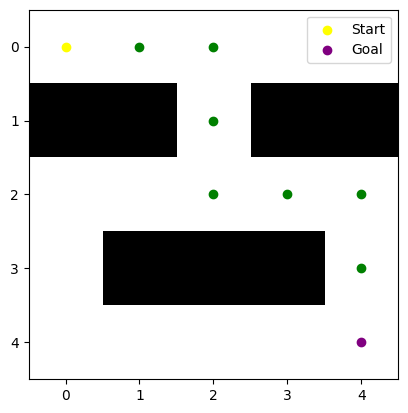

Este problema puede formularse como sigue:

- **Estados:** cualquier ubicación que se encuentre el robot en una celda desbloqueada.
- **Estado inicial:** ubicación del robot sobre una celda desbloqueada.
- **Función sucesora:** generar estados legales al aplicar los movimientos en las direcciones $\left(N, S, O, E\right)$.
- **Condición meta:** que el robot se encuentre sobre la celda objetivo desbloqueda.
- **Heurística:**

In [135]:
import sys,os
import numpy as np

# Obtenemos la ruta absoluta de la ruta relativa "../src"
# i.e. "../src" -> "/home/juandto/FIE/Inteligencia_artificial/searchs_ia/src" 
baile_path = os.path.abspath(os.path.join("..", "src"))

# sys.path contiene una lista de directorios donde el intérprete buscará
# el módulo requerido
if not baile_path in sys.path:
  # Añadimos el directorio en caso de que no esté
  sys.path.append(baile_path)

import SimpleSearch as ss

In [136]:
init_state = (
    (2, 0, 0, 0, 0),
    (0, 1, 0, 1, 1),
    (0, 0, 0, 0, 0),
    (0, 1, 1, 1, 0),
    (0, 0, 0, 0, 0)
    )

start = ss.node(init_state, op="start")

fin_state = (
    (0, 0, 0, 0, 0),
    (0, 1, 0, 1, 1),
    (0, 0, 0, 0, 0),
    (0, 1, 1, 1, 0),
    (0, 0, 0, 0, 2)
    )

final = ss.node(fin_state)

In [137]:
def successor(node):
  maze = node.state # maze = laberinto
  sucessors = []

  # Encontrar el robot (2) en el tablero. El resultado se almacena en index
  for index,value in np.ndenumerate(maze):
    if value == 2:
      break

  # Generar los estados válidos para los que podrá moverse el robot
  # (-1, 0) = N
  # (1, 0) = S
  # (0, -1) = O
  # (0, 1) = E
  x, y = index
  for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
    nx, ny = x + dx, y + dy
    if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
      nmaze = [list(r[:]) for r in maze] # Se hace una copia del tablero original
      nmaze[x][y] = 0 # Se marca como vacía la posición antigua del robot
      nmaze[nx][ny] = 2 # Se marca como ocupada la nueva posición del robot
      nmaze = tuple([tuple(r) for r in nmaze]) # Hacer inmutable
      sucessors.append(ss.node(nmaze, depth=node.depth+1, op=f'robot moved from ({x}, {y}) to ({nx}, {ny})', parent=node))

  return sucessors

In [138]:
def goal(*nodes):
  current = nodes[0]
  final = nodes[1]
  return current.state == final.state

In [139]:
bfs = ss.BlindSearch(start, successor, goal, goal_state=final, strategy="bfs")
dfs = ss.BlindSearch(start, successor, goal, goal_state=final, strategy="dfs")

In [140]:
resb = bfs.find() # Realiza BFS

finished in 19 iterations
Se acabaron los estados: 0


In [141]:
print(resb.state)

((0, 0, 0, 0, 0), (0, 1, 0, 1, 1), (0, 0, 0, 0, 0), (0, 1, 1, 1, 0), (0, 0, 0, 0, 2))


In [142]:
seqb = resb.getPath()

In [143]:
print("La secuencia de solución tiene %s pasos" %len(seqb))
seqb #Solución

La secuencia de solución tiene 9 pasos


[(((2, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'start',
  0),
 (((0, 2, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (0, 0) to (0, 1)',
  1),
 (((0, 0, 2, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (0, 1) to (0, 2)',
  2),
 (((0, 0, 0, 0, 0),
   (0, 1, 2, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (0, 2) to (1, 2)',
  3),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 2, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (1, 2) to (2, 2)',
  4),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 2, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (2, 2) to (2, 3)',
  5),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 2),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (2, 3) to (2, 4)',
  6),
 (((0,

In [144]:
resd = dfs.find() # Realiza DFS

finished in 8 iterations
Se acabaron los estados: 3


In [145]:
seqd = resd.getPath()

In [146]:
print("La secuencia de solución tiene %s pasos" %len(seqd))
seqd

La secuencia de solución tiene 9 pasos


[(((2, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'start',
  0),
 (((0, 0, 0, 0, 0),
   (2, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (0, 0) to (1, 0)',
  1),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (2, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (1, 0) to (2, 0)',
  2),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (2, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (2, 0) to (3, 0)',
  3),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (2, 0, 0, 0, 0)),
  'robot moved from (3, 0) to (4, 0)',
  4),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 2, 0, 0, 0)),
  'robot moved from (4, 0) to (4, 1)',
  5),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 2, 0, 0)),
  'robot moved from (4, 1) to (4, 2)',
  6),
 (((0,

In [147]:
def manhattan(*nodes):
  current_s = nodes[0].state
  goal_s = nodes[1].state

  
  # Encontrar el robot (2) en el tablero. El resultado se almacena en index_c
  for index_c,value in np.ndenumerate(current_s):
    if value == 2:
      break

  # Encontrar la posición final del robot (2) en el tablero. El resultado se almacena en index_g
  for index_g,value in np.ndenumerate(goal_s):
    if value == 2:
      break 

  # Calcular los pasos horizontales y verticales para la meta
  dis = (abs(index_g[0] - index_c[0]), abs(index_g[1] - index_c[1]))  
  
  # Retornar los pasos totales
  return dis[0] + dis[1]

In [148]:
manhattan(start, final)

8

In [149]:
astars = ss.BlindSearch(start, successor, goal, goal_state=final, strategy="a*", heuristic=manhattan)

In [150]:
resa = astars.find()

finished in 19 iterations
Se acabaron los estados: 0


In [151]:
seqa = resa.getPath()

In [152]:
print("La secuencia de solución tiene %s pasos" %len(seqa))
seqa

La secuencia de solución tiene 9 pasos


[(((2, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'start',
  0),
 (((0, 0, 0, 0, 0),
   (2, 1, 0, 1, 1),
   (0, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (0, 0) to (1, 0)',
  1),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (2, 0, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (1, 0) to (2, 0)',
  2),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 2, 0, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (2, 0) to (2, 1)',
  3),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 2, 0, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (2, 1) to (2, 2)',
  4),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 2, 0),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (2, 2) to (2, 3)',
  5),
 (((0, 0, 0, 0, 0),
   (0, 1, 0, 1, 1),
   (0, 0, 0, 0, 2),
   (0, 1, 1, 1, 0),
   (0, 0, 0, 0, 0)),
  'robot moved from (2, 3) to (2, 4)',
  6),
 (((0,

In [153]:
%time bfs.find() # execution time of BFS

finished in 19 iterations
Se acabaron los estados: 0
CPU times: user 792 μs, sys: 984 μs, total: 1.78 ms
Wall time: 12.6 ms


In [154]:
%time dfs.find() # execution time of DFS

finished in 8 iterations
Se acabaron los estados: 3
CPU times: user 1.19 ms, sys: 0 ns, total: 1.19 ms
Wall time: 12.5 ms


In [155]:
%time astars.find() # execution time of DFS

finished in 19 iterations
Se acabaron los estados: 0
CPU times: user 2.19 ms, sys: 1.06 ms, total: 3.25 ms
Wall time: 8.1 ms
